<h1><center>Laboratorio 6: La desperación de Mr. Lepin 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Christopher Lara
- Nombre de alumno 2: Abiam Tamburrini


### **Link de repositorio de GitHub:** `https://github.com/ChrisLara95/Labs.git`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines.
- Aplicar Clusters sobre un conjunto de datos.

## Reglas:

- Fecha de entrega: 12/11/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Comprender y aprovechar las ventajas que nos ofrece la librería `pandas` con respecto a trabajar en Python 'puro'.
- Crear nuevas características para entrenar un modelo de clustering.
- Comprender como aplicar pipelines de Scikit-Learn para generar procesos más limpios.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [10]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

Requirement already up-to-date: plotly in ./testenv/lib/python3.8/site-packages (5.4.0)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin, en una nueva reunión, le cuenta a ud y su equipo que los resultados derivados del análisis exploratorio de dato presentaron una gran utilidad para la empresa y que tiene un gran entusiasmo por continuar trabajando con ustedes.
Es por esto, que Mr. Lepin les pide que cargue y visualicen algunas de las filas que componen el Dataset.
A continuación un extracto de lo parlamentado en la reunión:

    - Usted: Es un gran logro para nuestro equipo que usted haya encontrado excelente el EDA. ¿Qué tiene en mente ahora?
    - Mr. Lepin: Resulta que hace algún tiempo, mientras tomaba un mojito en una reunión de gerentes en Panamá, oí a un *chato* acerca de **LRMFP**, que es un modelo que permite personificar a los clientes a través de la farbicación de distintos atributos que describen a los clientes. Lo encontré es-tu-pendo ñatito. 
    - Usted: Ehh bueno. Investigaremos acerca de este modelo y veremos lo que podemos hacer.

Por ende, su siguiente tarea es calcular **LRMFP** sobre cada cliente y luego hacer un análisis de las características generadas. Para esto, el área de ventas les entrega un nuevo archivo llamado `online_retail_II_cleaned.pickle`, quien posee los datos del DataFrame original limpios y listos para obtener las características solicitadas por Mr. Lepin.

In [11]:
df_retail = pd.read_pickle("online_retail_II_cleaned.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": "category",
        "Description": str,
        "Customer ID": "category",
        "Country": "category"
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Creación de nuevas Caracteristicas [2 Puntos] 

**Ejemplo de Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

Como ya se les comento, Mr. Lepin esta interesado en obtener las características **LRMFP**, para esto les señala que estas características se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.
- **Recency (R)**: Indica la actualidad de la interacción de un cliente con la empresa, y da información sobre la tendencia a repetir la compra. Se define como: 
$$Recency(n)=\dfrac{1}{n} \sum^n_{i=1} date\_diff(t_{fecha final}, t_{m-i+1})$$

 Donde $date\_diff$ representa la diferencia en días entre la fecha de finalización del periodo de observación ($t_{fecha final}$), y la fecha de una visita del cliente cercana a $t_{fecha final}$, $t_{m-i+1}; t_{m}$ es la última visita del cliente; y n es el número de visitas recientes del cliente consideradas.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente. 

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.
 

$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**Nota:** Para la $fechafinal$ utilice la fecha máxima del dataset más 1 día.

**Respuesta:**

In [12]:
def custom_features(dataframe_in):
    #LRFMP
    #crear columna de gasto por cada producto
    dataframe_in['gastos']=dataframe_in['Price']*dataframe_in['Quantity']
    #eliminar columnas irrelevantes
    limpieza1=dataframe_in.drop(['StockCode', 'Quantity','Price','Description', 'Country'], axis=1)
    
    #######LLLLLL#####
    ###sacar resta de días
    agrupar=dataframe_in[['Customer ID','InvoiceDate']].groupby(['Customer ID'])
    resultado1=agrupar.describe()
    ida_no_unica=resultado1[resultado1[('InvoiceDate','unique')]!=1]
    #ida_unica=resultado1[resultado1[('InvoiceDate','unique')]==1].reset_index()

    length=(ida_no_unica[('InvoiceDate','last')]-ida_no_unica[('InvoiceDate','first')]).dt.days.reset_index()
    length.columns = ['Customer ID', 'Length']
############################################
    #######RRRRR#####
    #recency, fijamos fecha final de obs y luego promedio sobre la resta
    fecha_max=limpieza1['InvoiceDate'].max() + timedelta(days=1)
    limpieza1['t_obs']=(fecha_max-limpieza1['InvoiceDate']).dt.days
    recency=limpieza1.drop_duplicates(subset=['Customer ID','t_obs'])
    recency=recency[['Customer ID','t_obs']].groupby('Customer ID').mean()
    recency=recency.reset_index()

############################################
    #######FFFFFF######len 4314
    #eliminamos duplicado para así tener la info de 1 cliente por dia
    frequency=limpieza1.drop_duplicates(subset=['Customer ID','t_obs'])
    frequency=frequency.groupby('Customer ID').size().reset_index()
    frequency.columns = ['Customer ID', 'Fre']

    
############################################
    ######MMMMMM######4314
    ##gasto promedio
    monetary=limpieza1[['Customer ID','gastos']].groupby(['Customer ID']).mean().reset_index()

    
############################################
    ######PPPPPP######
    #periodicity, pasamos los tiempos a [ns] para poder aplicar .diff()
    #ya que no funcionó con fechas. Luego lo pasamos a dias
    perio=limpieza1.drop_duplicates(subset=['Customer ID','t_obs'])
    perio=perio[['InvoiceDate','Customer ID']]
    perio['seg']=perio['InvoiceDate'].astype(int)
    perio['diff']=(perio[['Customer ID','seg']].groupby('Customer ID').diff())
    perio=perio.dropna()
    periodicity=perio[['Customer ID','diff']].groupby('Customer ID').std().fillna(0).reset_index()
    ###pasando diff a dias
    periodicity['diff']=periodicity['diff']*(10**(-9))/60/60/24
   
    #agrupamos los set de datos
    resultado= pd.concat([recency,monetary['gastos'],frequency['Fre'],periodicity['diff']],axis=1)
    #nos preocupamos que todos tengan el mismo largo
    resultado= pd.merge(left=length, right=resultado, on="Customer ID",
         how="inner",
         sort=True)
    
    
    resultado.columns = ['Customer ID','Length','Recency','Monetary','Frequency','Periodicity']
    
    return (resultado)

    pass

LRMFP=custom_features(df_retail)

/Users/christopherlara/DS_course/Labs/Lab6/testenv/lib/python3.8/site-packages/pandas/core/groupby/groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/var/folders/tw/njmbb27s72j5p4r2vj1v0wnw0000gn/T/ipykernel_4442/4167995524.py:46: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  perio['seg']=perio['InvoiceDate'].astype(int)


### **Resúesta de Pauta:**

In [13]:
display(LRMFP)

,Customer ID,Length,Recency,Monetary,Frequency,Periodicity
0,12346.0,196,308.285714,11.298788,7,43.601225
1,12347.0,37,21.500000,18.638310,2,0.000000
2,12349.0,181,158.000000,26.187647,3,101.876901
3,12352.0,16,19.500000,19.100000,2,0.000000
4,12356.0,44,35.000000,42.895181,3,12.924341
...,...,...,...,...,...,...
2892,18276.0,336,169.800000,16.508250,5,37.606102
2893,18277.0,97,71.666667,19.101250,3,41.657428
2894,18283.0,275,193.000000,2.854240,5,62.008786
2895,18286.0,247,235.500000,19.349701,2,0.000000


In [14]:
LRMFP_f=LRMFP.astype(float)
#paso datos a float no categoricos

## 1.3 Pipelines 👷

Finalmente *Don Mora* le pregunta si seria posible realizar un pipeline para realizar una segmentación de los clientes con los nuevos datos generados, a lo que usted responde que **sí** y propone la utilización de k-means para la segmentación.

A continuación siga los pasos requeridos para obtener la segmentación de clientes.

### 1.3.1 Estandarizar Caracteristicas [0.5 puntos]

Construya una clase llamada ``MinMax()`` utilizando ``BaseEstimator`` y ``TransformerMixin`` para realizar una transformación de cada una de las columnas de un DataFrame utilizando ``ColumnTransformer()`` más tarde (tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer)).


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$

Con esto buscamos que los valores que componen a las columnas se muevan en el rango de valores $[0, 1]$.

**Respuesta:**

In [15]:
class MinMax(BaseEstimator, TransformerMixin):
    #se crea clase de estandarización
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        resultado=(X.loc[:] - X.loc[:].min())/(X.loc[:].max()-X.loc[:].min())
        return (resultado)
    
    pass

dataset_stand=MinMax().transform(LRMFP_f)
dataset_stand.head(10)

,Customer ID,Length,Recency,Monetary,Frequency,Periodicity
0,0.000000,0.525469,0.822394,0.001338,0.047244,0.170486
1,0.000168,0.099196,0.047297,0.002393,0.007874,0.000000
2,0.000505,0.485255,0.416216,0.003478,0.015748,0.398351
3,0.001010,0.042895,0.041892,0.002459,0.007874,0.000000
4,0.001683,0.117962,0.083784,0.005880,0.015748,0.050536
5,0.001852,0.000000,0.054054,0.010238,0.000000,0.000000
6,0.002020,0.954424,0.497297,0.006453,0.015748,0.017282
7,0.002188,0.825737,0.664865,0.002863,0.039370,0.178656
8,0.002357,0.739946,0.418378,0.002312,0.031496,0.277614
9,0.002525,0.589812,0.557658,0.002145,0.015748,0.038574


### 1.3.2 `T-SNA` Pipeline [1.0 puntos]

Para comenzar introduciéndose en el uso de pipeline, decide probar realizando un pipeline enfocado en la reducción de dimensionalidad y así hacer no decepcionar a Mr. Lepin con la clusterización del modelo. 

Configure un pipeline utilizando el algoritmo `T-SNE` sobre los datos **LRMFP**, donde, para la realización del pipeline considera los siguientes pasos:

1. Como primer paso obtenga las características **LRMFP** desde el DataFrame ``df_retail_II_cleaned.pickle`` utilizando la función ``custom_features`` creada anteriormente, junto a ``FunctionTransformer()``. Considere esto como el primer paso de su pipeline.
2. En segundo lugar usando ``ColumnTransformer()`` aplique el MinxMax scaler creado por usted sobre todas las columnas generadas en el paso anterior. 
3. Finalmente, aplique un último paso donde obtiene las 2 componentes más relevantes utilizando el algoritmo T-sne de sckit-learn.

Tras aplicar las transformaciones sobre el dataset **LRMFP**, gráfique las componentes obtenidas en la reducción de dimensionalidad.

**Respuesta:**

In [16]:
#1
Func_Trans = FunctionTransformer(custom_features)
Func_Trans.transform(df_retail)

/Users/christopherlara/DS_course/Labs/Lab6/testenv/lib/python3.8/site-packages/pandas/core/groupby/groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/var/folders/tw/njmbb27s72j5p4r2vj1v0wnw0000gn/T/ipykernel_4442/4167995524.py:46: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  perio['seg']=perio['InvoiceDate'].astype(int)


,Customer ID,Length,Recency,Monetary,Frequency,Periodicity
0,12346.0,196,308.285714,11.298788,7,43.601225
1,12347.0,37,21.500000,18.638310,2,0.000000
2,12349.0,181,158.000000,26.187647,3,101.876901
3,12352.0,16,19.500000,19.100000,2,0.000000
4,12356.0,44,35.000000,42.895181,3,12.924341
...,...,...,...,...,...,...
2892,18276.0,336,169.800000,16.508250,5,37.606102
2893,18277.0,97,71.666667,19.101250,3,41.657428
2894,18283.0,275,193.000000,2.854240,5,62.008786
2895,18286.0,247,235.500000,19.349701,2,0.000000


In [17]:

stand_transf_column = ColumnTransformer(
    [('Minmax', MinMax(), ['Length', 'Recency', 'Frequency','Monetary', 'Periodicity'])
    ])
df_pipeline = Pipeline([('estandarizacion', stand_transf_column)])

In [18]:
#3
principal = TSNE(random_state=10)
tsne_LRMFP_stand = principal.fit_transform(dataset_stand)
tsne_LRMFP_stand

/Users/christopherlara/DS_course/Labs/Lab6/testenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/christopherlara/DS_course/Labs/Lab6/testenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-2.4214587e+00,  2.6943893e+01],
       [ 3.6068283e+01,  5.1464478e+01],
       [-2.6327530e+01,  2.3925690e+01],
       ...,
       [-1.8721958e+01, -3.8615700e+01],
       [ 3.1341959e-02, -4.5749474e+01],
       [ 1.5842525e+01, -4.2117676e+01]], dtype=float32)

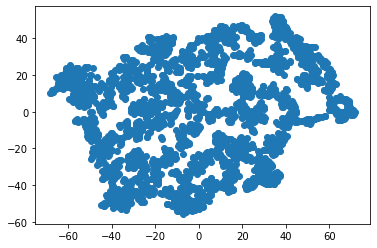

In [19]:
#grafica de TSNe
import matplotlib.pyplot as plt
plt.scatter(tsne_LRMFP_stand[:,0], tsne_LRMFP_stand[:,1])
plt.show()

### 1.3.3 Clustering

#### 1.3.3.1 Método del Codo [1 puntos]

Utilizando la clase creada para escalamiento, aplique el método del codo para visualizar cual es el número de clusters que mejor se ajustan a los datos. Realice esto utilizando el algoritmo K-means dentro de un pipeline para un $k \in [1,20]$, donde k representa el número de clusters del k-means. Para la realización de esta sección y la próxima (1.3.3.2), considere los mismos pasos utilizados para el t-sne, pero permutando el algoritmo de reducción de dimensionalidad por k-means.

A través del grafico obtenido, comente y justifique que valor de k escogería para realizar el k-means.

**Respuesta:**

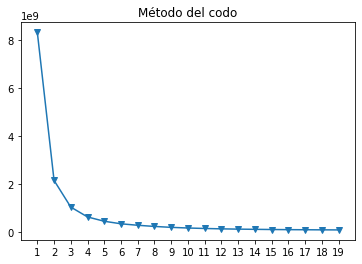

In [20]:
#se realiza clustering para metodo del codo
sse = []
clusterings = list(range(1, 20))

for i in clusterings:
    
    k_means = KMeans(n_clusters=i).fit(LRMFP_f)
    sse.append(k_means.inertia_)

plt.plot(clusterings, sse, marker="v")
plt.xlim(0,20)
plt.title("Método del codo")
plt.xticks(clusterings)
plt.show()

In [21]:
#Escogería k igual a 3, ya que es en ese punto en que vemos un cambio 
#significativo en la pendiente, generando la analogía al codo de un brazo.
#Por lo cual, acorde a lo visto en clases sobre el método, se sugiere que
#este valor es ideal para fijar el numero de kmeans

#### 1.3.3.2 Segmentación de Clientes con K-Means 🎁 [1 punto]

En base a la elección de k realizada en la sección anterior, utilice este valor escogido y entrene un modelo de K-means utilizando el mismo pipeline de scikit-learn utilizado anteriormente.

Una vez ajustado los datos, genere una tabla con los promedios (o medianas) para cada uno de los atributos, agrupando estos por el clúster que pertenecen. ¿Es posible observar agrupaciones coherentes?, ¿Qué tipo de clientes posee el retail?, Justifique su respuesta y no decepcione a Mr. Lepin.


**Respuesta:**

In [46]:
#df2=df_retail.drop(['StockCode', 'Quantity','Price','Description', 'Country'])
kmeans_pipeline = Pipeline([('LRMFP', Func_Trans),
                            ('estandarizacion', stand_transf_column),
                            ('clustering', KMeans(n_clusters=3)),
                           ])
clusters = kmeans_pipeline.fit_predict(df_retail)
dataset_stand['N_Cluster'] = clusters
display(dataset_stand.head(5))

/Users/christopherlara/DS_course/Labs/Lab6/testenv/lib/python3.8/site-packages/pandas/core/groupby/groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/var/folders/tw/njmbb27s72j5p4r2vj1v0wnw0000gn/T/ipykernel_4442/4167995524.py:46: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  perio['seg']=perio['InvoiceDate'].astype(int)


,Customer ID,Length,Recency,Monetary,Frequency,Periodicity,N_Cluster
0,0.000000,0.525469,0.822394,0.001338,0.047244,0.170486,2
1,0.000168,0.099196,0.047297,0.002393,0.007874,0.000000,0
2,0.000505,0.485255,0.416216,0.003478,0.015748,0.398351,1
3,0.001010,0.042895,0.041892,0.002459,0.007874,0.000000,0
4,0.001683,0.117962,0.083784,0.005880,0.015748,0.050536,0


In [47]:
dataset_stand.groupby('N_Cluster').mean()

,Customer ID,Length,Recency,Monetary,Frequency,Periodicity
N_Cluster,,,,,,
0,0.516307,0.214339,0.198974,0.004354,0.015371,0.041718
1,0.502714,0.790781,0.466257,0.004509,0.052362,0.169002
2,0.498163,0.320961,0.613567,0.006458,0.014973,0.050473


In [48]:
#Del cluster tenemos 3 tipos de clientes, donde los llamaremos 0,1,2 
#acorde al numero de clusters
#tenemos clientes que asisten con mayor frecuencia, mientras que otros
#2 lo hacen con menor frecuencia. A su vez, dentro de los que lo hacen
#con menor frecuencia tienen distinta cantidad de gasto. Pero a su vez,
#el gasto del cliente más frecuente es similar a uno de los que tiene 
#menor frecuencia. Además el cliente de mayor frecuencia tiene una mayor
#periodicidad. Mientras que la periodicidad de los de menor frecuencia
#es distinta.
#Por lo cual, a partir de los clauster podemos desprender diferentes
#conclusiones, lo que es coherente a tener distintos perfiles.

**Respuesta Esperada:**

|         | Length  | Recency   | Frequency | Monetary | Periodicity |       |
|---------|---------|-----------|----------|-------------|-------|-------|
| Cluster |         |           |          |             |       |       |
|    0    |   258.8 |      45.2 |     76.1 |      1107.7 | 107.6 |   449 |
|    1    |    76.1 |     217.6 |     45.5 |       791.7 |  14.1 |   466 |
|    2    |   368.5 |       4.8 |   2715.0 |    226621.6 |   4.2 |     4 |
|    3    |    85.3 |      45.7 |     65.8 |      1047.0 |  10.5 |   987 |
|    4    |   347.2 |      15.9 |   1658.0 |     35829.3 |   8.0 |    25 |
|    5    |   298.0 |      29.8 |    183.8 |      3639.9 |  32.0 |  1188 |

#### 1.3.3.3 Plot de K-Means 📈 [0.5 puntos]



Por último, Mr. Lepin, impaciente de no entender lo que usted intenta explicarle, le solicita que por favor muestre algún resultado "visual" de los grupos encontrados.

Para esto, grafique nuevamente las características encontradas usando `T-SNE` (no calcule de nuevo, simplemente utilice las proyecciones encontradas) y agregue las labels calculadas con kmeans como el argumento `color`.   

Comente: ¿Se separan bien los distintos clusters en la visualización?


**Respuesta:**

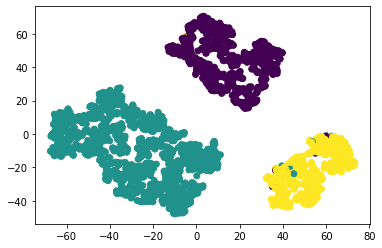

In [49]:
plt.scatter(tsne_LRMFP_stand[:,0], tsne_LRMFP_stand[:,1], c=clusters)
plt.show()

In [ ]:
#se separan muy bien los cluster

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>